memory management

split-reward-training
- pretrain       77.32  +-  4.55
- scratch        72.16  +-  4.24

no-split-reward-training
- pretrain       79.8  +-  4.18
- scratch        75.68  +-  5.25

In [ ]:
import logging

logger = logging.getLogger()
logger.disabled = True

import numpy as np
from tqdm.auto import tqdm

from agent import HandcraftedAgent


capacity = {"episodic": 8, "episodic_agent": 8, "semantic": 8, "short": 1}


config = {
    "question_prob": 1.0,
    "seed": 42,
    "terminates_at": 99,
}

results = {}

for mm_policy in ["episodic", "random", "generalize"]:
    for qa_policy in ["random", "episodic", "episodic_semantic"]:
        for explore_policy in ["random", "avoid_walls"]:
            for pretrain_semantic in [True, False]:
                key = (
                    mm_policy,
                    qa_policy,
                    explore_policy,
                    pretrain_semantic,
                )
                if key not in results:
                    results[key] = []
                print(key)

                for seed in tqdm([0, 1, 2, 3, 4]):
                    config["seed"] = seed

                    agent = HandcraftedAgent(
                        env_str="room_env:RoomEnv-v2",
                        env_config=config,
                        mm_policy=mm_policy,
                        qa_policy=qa_policy,
                        explore_policy=explore_policy,
                        num_samples_for_results=10,
                        capacity=capacity,
                        pretrain_semantic=pretrain_semantic,
                    )
                    agent.test()
                    agent.remove_results_from_disk()
                    to_append = (np.mean(agent.scores), np.std(agent.scores))
                    # print(to_append)
                    results[key].append(to_append)

In [13]:
print(
    f"{'memory mgmt':<20}{'qa':<20}{'explore':<20}{'pretrain_semantic':<20}{'mean':<10}{'std':<10}"
)
print(f"-" * 110)
for key, val in results.items():
    print(
        f"{str(key[0]):<20}{str(key[1]):<20}{str(key[2]):<20}{str(key[3]):<20}{round(np.mean([v[0] for v in val]), 2):<10}{round(np.std([v[0] for v in val]), 2):<10}"
    )

memory mgmt         qa                  explore             pretrain_semantic   mean      std       
--------------------------------------------------------------------------------------------------------------
episodic            random              random              True                -67.68    1.65      
episodic            random              random              False               -67.68    1.65      
episodic            random              avoid_walls         True                -68.56    1.83      
episodic            random              avoid_walls         False               -68.56    1.83      
episodic            episodic            random              True                -33.24    2.81      
episodic            episodic            random              False               -33.24    2.81      
episodic            episodic            avoid_walls         True                -35.68    1.02      
episodic            episodic            avoid_walls         False               -

In [15]:
from explicit_memory.utils import read_yaml

q_values = read_yaml("training_results/random=True_pretrain=False/q_values.yaml")

In [21]:
len(q_values["test"])

6445

In [22]:
q_values["test"]

[[[0.22466666996479034, 0.13538646697998047, 0.2130594551563263]],
 [[0.22735720872879028, 0.13730376958847046, 0.21522897481918335]],
 [[0.22542044520378113, 0.1366627812385559, 0.2123594880104065]],
 [[0.225324809551239, 0.1353471279144287, 0.21380451321601868]],
 [[0.2263592779636383, 0.13681066036224365, 0.21341145038604736]],
 [[0.22633978724479675, 0.13583199679851532, 0.21499592065811157]],
 [[0.2285727858543396, 0.13891251385211945, 0.2148064523935318]],
 [[0.22677260637283325, 0.13703370094299316, 0.21319328248500824]],
 [[0.21196354925632477, 0.1278272271156311, 0.20125386118888855]],
 [[0.20490548014640808, 0.12544849514961243, 0.1927170753479004]],
 [[0.22922930121421814, 0.13756582140922546, 0.21812596917152405]],
 [[0.22303295135498047, 0.13354337215423584, 0.21272732317447662]],
 [[0.2103373408317566, 0.12773752212524414, 0.20094428956508636]],
 [[0.2242368906736374, 0.13489794731140137, 0.21417628228664398]],
 [[0.22568538784980774, 0.1373441517353058, 0.212922722101211

In [23]:
from explicit_memory.utils import read_yaml

q_values = read_yaml("training_results/random=True_pretrain=True/q_values.yaml")
len(q_values["test"])

6445

In [24]:
q_values["test"]

[[[0.21500760316848755, 0.1783837229013443, 0.14225217700004578]],
 [[0.21784090995788574, 0.1804780215024948, 0.1429368555545807]],
 [[0.21898441016674042, 0.18109771609306335, 0.1436898410320282]],
 [[0.2197870910167694, 0.18167906999588013, 0.1434825360774994]],
 [[0.22192761301994324, 0.18290895223617554, 0.1446968913078308]],
 [[0.22317436337471008, 0.18319037556648254, 0.1445784866809845]],
 [[0.22703459858894348, 0.18660381436347961, 0.14513415098190308]],
 [[0.22723054885864258, 0.18612127006053925, 0.1455191671848297]],
 [[0.2269585132598877, 0.1858104169368744, 0.14561647176742554]],
 [[0.22473949193954468, 0.18452519178390503, 0.14468549191951752]],
 [[0.21377238631248474, 0.17666341364383698, 0.14291387796401978]],
 [[0.2185586541891098, 0.18082153797149658, 0.1430962085723877]],
 [[0.21901686489582062, 0.18104910850524902, 0.1432439386844635]],
 [[0.2151876986026764, 0.17827139794826508, 0.142848938703537]],
 [[0.22528396546840668, 0.1858462691307068, 0.1449011266231537]],

In [ ]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent.dqn import DQNExploreAgent, DQNMMAgent

for pretrain_semantic in [
    None,
    {
        "include_walls": True,
        "freeze": False,
        "return_remaining_space": False,
    },
    {
        "include_walls": False,
        "freeze": False,
        "return_remaining_space": False,
    },
]:
    for test_seed in [0, 1, 2, 3, 4]:
        all_params = {
            "env_str": "room_env:RoomEnv-v2",
            "max_epsilon": 1.0,
            "min_epsilon": 0.1,
            "epsilon_decay_until": 100 * 16,
            "gamma": 0.65,
            "capacity": {
                "episodic": 16,
                "episodic_agent": 16,
                "semantic": 16,
                "short": 1,
            },
            "nn_params": {
                "hidden_size": 64,
                "num_layers": 2,
                "embedding_dim": 32,
                "v1_params": None,
                "v2_params": {},
                "memory_of_interest": [
                    "episodic",
                    "episodic_agent",
                    "semantic",
                    "short",
                ],
            },
            "num_iterations": 100 * 16,
            "replay_buffer_size": 1024 * 100,
            "warm_start": 1024 * 100,
            "batch_size": 1024,
            "target_update_rate": 10,
            "pretrain_semantic": pretrain_semantic,
            "run_validation": True,
            "run_test": True,
            "num_samples_for_results": 10,
            "train_seed": test_seed + 5,
            "plotting_interval": 10,
            "device": "cpu",
            "test_seed": test_seed,
            # "mm_policy": "generalize",
            "qa_policy": "episodic_semantic",
            "explore_policy": "avoid_walls",
            "env_config": {
                "question_prob": 1.0,
                "terminates_at": 99,
                "room_size": "dev",
            },
            "ddqn": False,
            "dueling_dqn": False,
            "split_reward_training": False,
        }
        # all_params = {
        #     "env_str": "room_env:RoomEnv-v2",
        #     "max_epsilon": 1.0,
        #     "min_epsilon": 0.1,
        #     "epsilon_decay_until": 10 * 16,
        #     "gamma": 0.65,
        #     "capacity": {
        #         "episodic": 4,
        #         "episodic_agent": 4,
        #         "semantic": 4,
        #         "short": 1,
        #     },
        #     "nn_params": {
        #         "hidden_size": 8,
        #         "num_layers": 2,
        #         "embedding_dim": 4,
        #         "v1_params": None,
        #         "v2_params": {},
        #         "memory_of_interest": [
        #             "episodic",
        #             "episodic_agent",
        #             "semantic",
        #             "short",
        #         ],
        #     },
        #     "num_iterations": 10 * 16,
        #     "replay_buffer_size": 16,
        #     "warm_start": 16,
        #     "batch_size": 4,
        #     "target_update_rate": 10,
        #     "pretrain_semantic": pretrain_semantic,
        #     "run_validation": True,
        #     "run_test": True,
        #     "num_samples_for_results": 3,
        #     "train_seed": test_seed + 5,
        #     "plotting_interval": 10,
        #     "device": "cpu",
        #     "test_seed": test_seed,
        #     "mm_policy": "generalize",
        #     "qa_policy": "episodic_semantic",
        #     "env_config": {
        #         "question_prob": 1.0,
        #         "terminates_at": 9,
        #         "room_size": "dev",
        #     },
        #     "ddqn": True,
        #     "dueling_dqn": True,
        # }

        agent = DQNMMAgent(**all_params)
        agent.train()

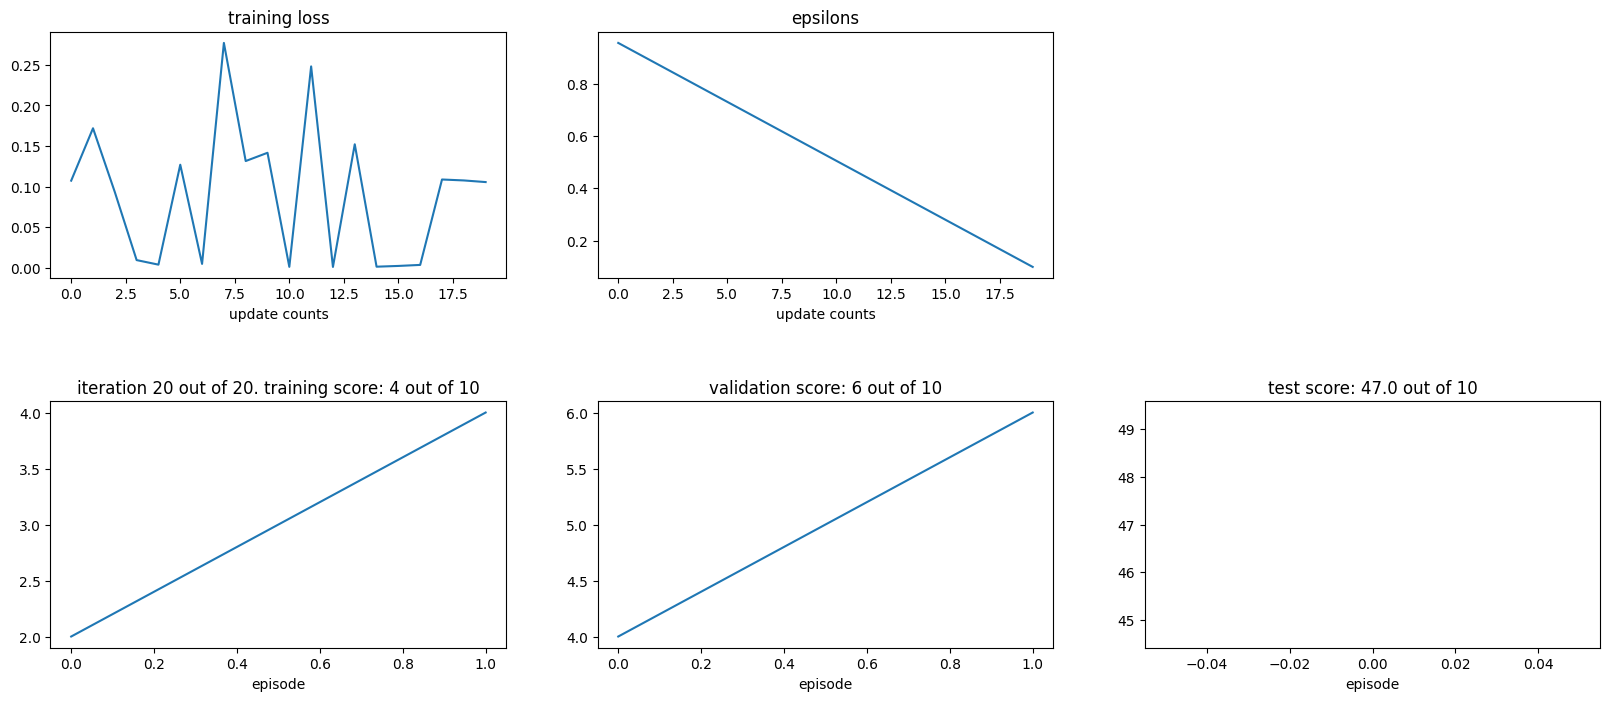

In [ ]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent.dqn import DQNExploreAgent, DQNMMAgent

# all_params = {
#     "env_str": "room_env:RoomEnv-v2",
#     "max_epsilon": 1.0,
#     "min_epsilon": 0.1,
#     "epsilon_decay_until": 100 * 16,
#     "gamma": 0.65,
#     "capacity": {"episodic": 16, "episodic_agent": 16, "semantic": 16, "short": 1},
#     "nn_params": {
#         "hidden_size": 64,
#         "num_layers": 2,
#         "embedding_dim": 32,
#         "v1_params": None,
#         "v2_params": {},
#         "memory_of_interest": ["episodic", "episodic_agent", "semantic", "short"],
#     },
#     "num_iterations": 100 * 16,
#     "replay_buffer_size": 1024 * 100,
#     "warm_start": 1024 * 100,
#     "batch_size": 1024,
#     "target_update_rate": 10,
#     "pretrain_semantic": False,
#     "run_validation": True,
#     "run_test": True,
#     "num_samples_for_results": 10,
#     "train_seed": 5,
#     "plotting_interval": 10,
#     "device": "cpu",
#     "test_seed": 0,
#     "qa_policy": "episodic_semantic",
#     "explore_policy": "avoid_walls",
#     "env_config": {
#         "question_prob": 1.0,
#         "terminates_at": 99,
#         "room_size": "dev",
#     },
#     "ddqn": True,
#     "dueling_dqn": True,
#     "split_reward_training": False,
# }

all_params = {
    "env_str": "room_env:RoomEnv-v2",
    "max_epsilon": 1.0,
    "min_epsilon": 0.1,
    "epsilon_decay_until": 10 * 2,
    "gamma": 0.65,
    "capacity": {"episodic": 16, "episodic_agent": 16, "semantic": 16, "short": 1},
    "nn_params": {
        "hidden_size": 64,
        "num_layers": 2,
        "embedding_dim": 32,
        "v1_params": None,
        "v2_params": {},
        "memory_of_interest": ["episodic", "episodic_agent", "semantic", "short"],
    },
    "num_iterations": 10 * 2,
    "replay_buffer_size": 16,
    "warm_start": 4,
    "batch_size": 4,
    "target_update_rate": 10,
    "pretrain_semantic": False,
    "run_validation": True,
    "run_test": True,
    "num_samples_for_results": 2,
    "train_seed": 5,
    "plotting_interval": 10,
    "device": "cpu",
    "test_seed": 0,
    "qa_policy": "episodic_semantic",
    "explore_policy": "avoid_walls",
    "env_config": {
        "question_prob": 1.0,
        "terminates_at": 9,
        "room_size": "dev",
    },
    "ddqn": True,
    "dueling_dqn": True,
    "split_reward_training": False,
}

agent = DQNMMAgent(**all_params)
agent.train()

In [ ]:
from glob import glob
from explicit_memory.utils import read_yaml

results = {"pretrain": [], "scratch": []}
for foo in glob("./training_results/*/*train.yaml"):
    bar = read_yaml(foo)
    # print(foo, bar["test_seed"], bar["pretrain_semantic"])

    foo_ = foo.replace("train.yaml", "results.yaml")

    bar_ = read_yaml(foo_)
    if bar["pretrain_semantic"]:
        results["pretrain"].append(bar_["test_score"])
    else:
        results["scratch"].append(bar_["test_score"])


foo = [foo["mean"] for foo in results["scratch"]]
print(f"{'scratch':<15}{round(np.mean(foo), 2)}  +-  {round(np.std(foo), 2)}")

foo = [foo["mean"] for foo in results["pretrain"]]
print(f"{'pretrain':<15}{round(np.mean(foo), 2)}  +-  {round(np.std(foo), 2)}")

In [ ]:
from glob import glob
from copy import deepcopy
from explicit_memory.utils import read_yaml
import os

results = {
    "split-reward-training": {"pretrain": [], "scratch": []},
    "no-split-reward-training": {"pretrain": [], "scratch": []},
}

for foo in deepcopy(glob("./training_results/mm/*/train.yaml")):
    baz = foo.replace("train.yaml", "results.yaml")
    bar = read_yaml(foo)
    qux = read_yaml(baz)
    if bar["split_reward_training"]:
        if bar["pretrain_semantic"]:
            results["split-reward-training"]["pretrain"].append(
                qux["test_score"]["mean"]
            )
        else:
            results["split-reward-training"]["scratch"].append(
                qux["test_score"]["mean"]
            )
    else:
        if bar["pretrain_semantic"]:
            results["no-split-reward-training"]["pretrain"].append(
                qux["test_score"]["mean"]
            )
        else:
            results["no-split-reward-training"]["scratch"].append(
                qux["test_score"]["mean"]
            )

In [ ]:
import numpy as np

for key, val in results.items():
    print(f"{key}")
    for key_, val_ in val.items():
        print(f"  {key_:<15}{round(np.mean(val_), 2)}  +-  {round(np.std(val_), 2)}")

split-reward-training
  pretrain       77.32  +-  4.55
  scratch        72.16  +-  4.24
no-split-reward-training
  pretrain       79.8  +-  4.18
  scratch        75.68  +-  5.25
